In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../Output-Files/t0_with_zipcodes.csv')
#df['Zip-code'].fillna('')
df.dropna(subset=['Zipcode-number', 'Zipcode-letters'], inplace=True)
print(df.keys())
print(df.info())


Index(['Respondentnummer', 'Gender', 'Geboortedatum', 'Leeftijd (op testdag)',
       'AST (tijd afgerond op 0.1s)', 'Lengte (afgerond op 0.1 cm)',
       'Gewicht (afgerond op 0.1 kg)', 'Lengte (in m)', 'BMI', 'Gymles',
       'Zwemles J/N', 'Zwemles', 'Schoolplein', 'Buiten spelen', 'Sport J/N',
       'TV kijken/tablet', '1. Rennen', '2. Bal gooien', '3. Galloperen',
       '4. Bal vangen', '5. Hinkelen', '6. Bal rollen', '7. Loopsprong',
       '8. Bal schoppen', '9. Voorw. Springen', '10. Knuppel',
       '11. Zijw. Gallop', '12. Stuiten bal', 'MQ', 'MQ category',
       'BMI category', 'MQ category binary', 'Zipcode-number',
       'Zipcode-letters'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 413 to 1270
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondentnummer              831 non-null    int64  
 1   Gender                

In [108]:
zip_list_strings = []
zip_list = []
#for i in df['Zipcode-number']:
    #if i not in zip_list and isinstance(i, str):
        #zip_list.append(i) 
zip_list = df['Zipcode-number'].unique()

for zip in zip_list:
    zip_list_strings.append(str(zip))
    

In [109]:
       
bmi_dict = {}
motor_categories = {}
motoric_bmi_dict = {}
motoric_gender_dict = {}
for index, rows in df.iterrows():
    if rows['Zipcode-number'] in zip_list:
       bmi_dict[str(rows['Zipcode-number'])] = []
       motor_categories[str(rows['Zipcode-number'])] = []
       motoric_bmi_dict[str(rows['Zipcode-number'])] = {}
       #motoric_gender_dict[str(rows['Zipcode-number'])] = {}
 
for index, rows in df.iterrows():
    if rows['Zipcode-number'] in zip_list:
        if not pd.isna(rows['BMI']):
            bmi_dict[str(rows['Zipcode-number'])].append(rows['BMI'])     

        if not pd.isna(rows['MQ category']):

            motor_categories[str(rows['Zipcode-number'])].append(int(rows['MQ category']))

        if not pd.isna(rows['MQ']) and not pd.isna(rows['BMI']):
            motoric_bmi_dict[str(rows['Zipcode-number'])] = []
        
        if not pd.isna(rows['MQ']) and not pd.isna(rows['Gender']):
            motoric_gender_dict[str(rows['Zipcode-number']), rows['Gender']] = []     

for index, rows in df.iterrows():
    if rows['Zipcode-number'] in zip_list:
        print('Hallo')
        if not pd.isna(rows['MQ']) and not pd.isna(rows['Gender']):
            print(rows['MQ'])
            motoric_gender_dict[str(rows['Zipcode-number']), rows['Gender']].append(rows['MQ'])

Hallo
103.347
Hallo
72.555
Hallo
89.571
Hallo
110.204
Hallo
99.245
Hallo
108.23
Hallo
77.188
Hallo
86.4
Hallo
83.862
Hallo
116.509
Hallo
97.664
Hallo
85.19
Hallo
97.84
Hallo
110.268
Hallo
42.267
Hallo
135.47
Hallo
111.65
Hallo
131.5
Hallo
110.042
Hallo
99.209
Hallo
116.117
Hallo
100.0
Hallo
119.324
Hallo
81.008
Hallo
132.828
Hallo
119.903
Hallo
140.341
Hallo
132.828
Hallo
81.25
Hallo
82.734
Hallo
137.696
Hallo
90.346
Hallo
111.915
Hallo
106.048
Hallo
133.974
Hallo
106.376
Hallo
103.139
Hallo
106.009
Hallo
100.766
Hallo
111.62
Hallo
101.646
Hallo
101.23
Hallo
105.2
Hallo
122.868
Hallo
97.048
Hallo
121.759
Hallo
124.121
Hallo
87.667
Hallo
130.0
Hallo
129.319
Hallo
97.538
Hallo
108.935
Hallo
129.545
Hallo
148.131
Hallo
78.274
Hallo
100.16
Hallo
138.428
Hallo
108.333
Hallo
101.23
Hallo
96.337
Hallo
118.468
Hallo
131.723
Hallo
144.749
Hallo
159.296
Hallo
138.428
Hallo
124.747
Hallo
140.341
Hallo
107.347
Hallo
110.577
Hallo
125.0
Hallo
122.897
Hallo
152.113
Hallo
110.268
Hallo
133.503
Hallo


In [110]:
children_swim_class_dict = {}
for index, rows in df.iterrows():
    
    if not pd.isna(rows['Zwemles J/N']):
        children_swim_class_dict[rows['Respondentnummer']] = rows['Zwemles J/N']

In [111]:
'''print('BMI DICT \n')
print(bmi_dict)
print('\n MOTOR CATEGORIES DICT \n')
print(motor_categories)
print('\n MOTOR BMI DICT \n')
print(motoric_bmi_dict)
'''
print('\n MOTOR GENDER DICT \n')
print(motoric_gender_dict)


 MOTOR GENDER DICT 

{('3191.0', 0.0): [103.347, 89.571, 110.204, 77.188, 86.4, 116.509, 97.664, 85.19, 110.268, 99.209, 119.324, 81.008, 119.903, 140.341, 81.25, 90.346, 133.974, 106.009, 101.646, 101.23], ('3191.0', 1.0): [72.555, 99.245, 108.23, 83.862, 97.84, 42.267, 135.47, 111.65, 131.5, 110.042, 116.117, 100.0, 132.828, 132.828, 82.734, 137.696, 111.915, 106.048, 106.376, 103.139, 100.766, 111.62], ('3082.0', 1.0): [105.2, 122.868, 97.048, 121.759, 87.667, 97.538, 108.935, 148.131, 78.274, 138.428, 96.337, 118.468, 144.749, 159.296, 138.428, 107.347, 110.577, 125.0, 122.897, 133.503, 124.057, 101.154, 101.322, 128.492, 126.374], ('3082.0', 0.0): [124.121, 130.0, 129.319, 129.545, 100.16, 108.333, 101.23, 131.723, 124.747, 140.341, 152.113, 110.268, 127.979, 124.855, 101.23], ('2562.0', 1.0): [122.995, 111.65, 113.861, 137.826], ('2562.0', 0.0): [145.294, 133.404, 122.886, 131.707], ('2546.0', 0.0): [112.608, 86.819, 122.52, 96.077, 61.048, 85.987, 113.148, 92.466, 99.128, 65.65

x:  3191.0   y:  15.931428571428572
x:  3082.0   y:  16.43375
x:  2562.0   y:  17.7075
x:  2546.0   y:  15.074761904761905
x:  2313.0   y:  16.80888888888889
x:  2545.0   y:  16.58866666666667
x:  2571.0   y:  16.92307692307692
x:  2516.0   y:  15.821818181818184
x:  3079.0   y:  16.263846153846153
x:  2548.0   y:  15.261875
x:  2271.0   y:  15.390606060606059
x:  2264.0   y:  16.31235294117647
x:  2266.0   y:  15.76636363636364
x:  2526.0   y:  16.227768595041322
x:  9977.0   y:  14.8327027027027
x:  9472.0   y:  15.580857142857141
x:  9713.0   y:  15.37230769230769
x:  9761.0   y:  15.833478260869564
x:  9751.0   y:  15.534696969696968
x:  9753.0   y:  15.677391304347825
x:  9722.0   y:  15.529887640449436
x:  9723.0   y:  15.102727272727275


/tmp/ipykernel_24220/503108057.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bmi_dict.keys(), rotation=90)


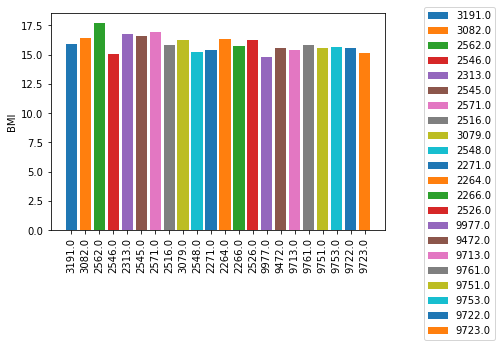

In [112]:
fig, ax = plt.subplots()
for key, value in bmi_dict.items():   
    x = key
    y = np.mean(value)
    print('x: ', x, ' ', 'y: ', y)
    ax.bar(x,y)

ax.set_xticklabels(bmi_dict.keys(), rotation=90)
ax.legend(bmi_dict.keys(), bbox_to_anchor=(1.1, 1.05))
ax.set_ylabel('BMI')
plt.show()

/tmp/ipykernel_24220/2583714718.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(motor_categories.keys(), rotation=90)


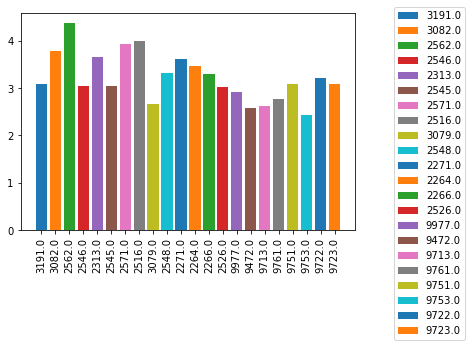

In [113]:
fig, ax = plt.subplots()

for key, value in motor_categories.items():
    x = key
    y = np.mean(value)
    ax.bar(x,y)

    
ax.set_xticklabels(motor_categories.keys(), rotation=90)
ax.legend(motor_categories.keys(), bbox_to_anchor=(1.1, 1.05))
plt.show()
ax.set_ylabel('motor categories')
plt.show()

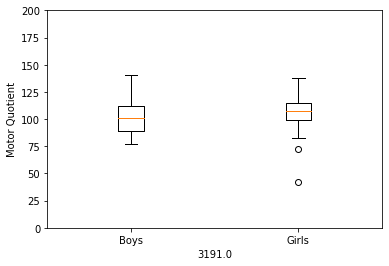

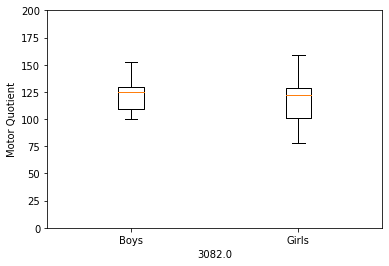

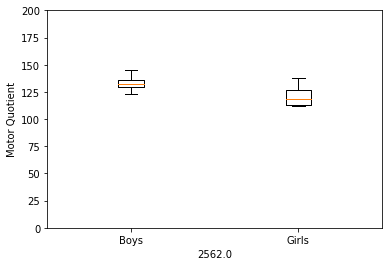

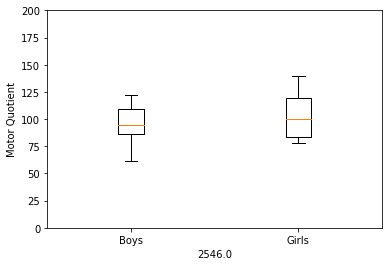

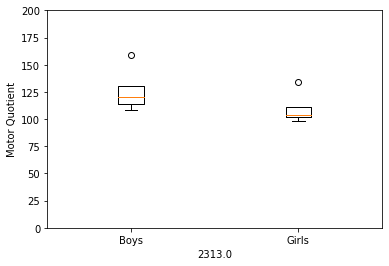

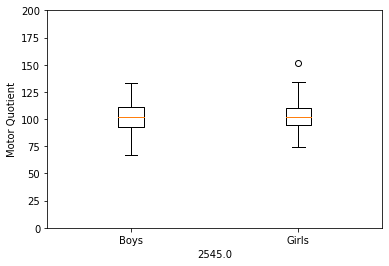

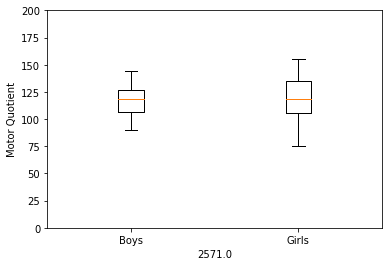

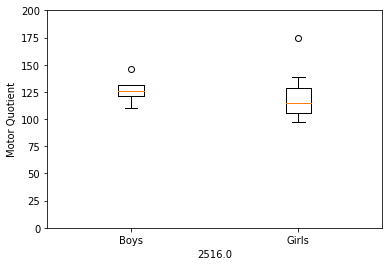

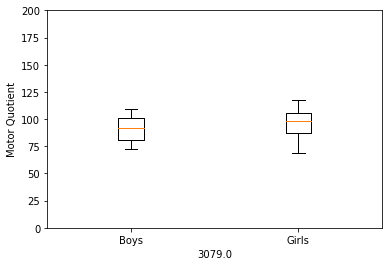

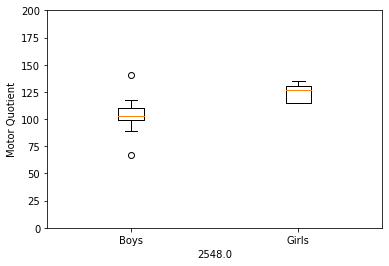

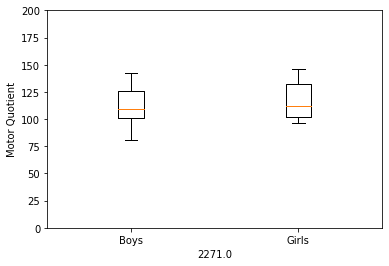

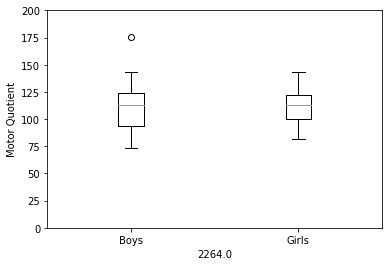

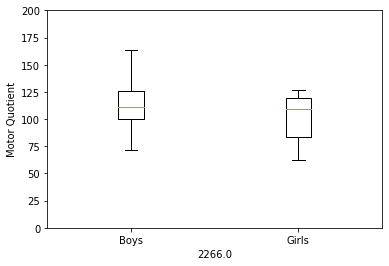

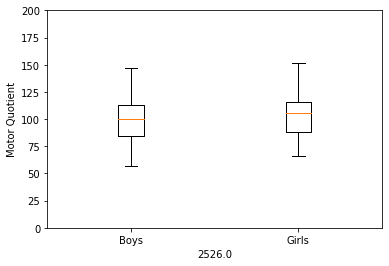

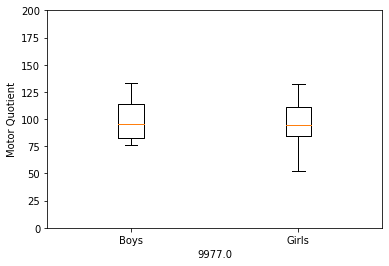

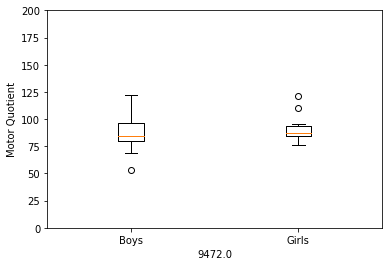

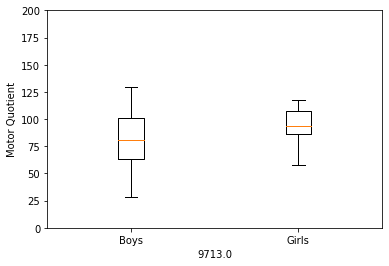

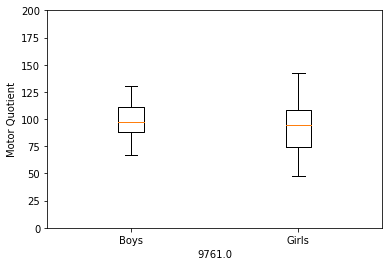

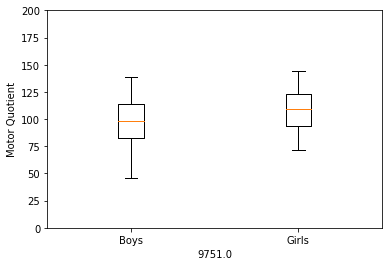

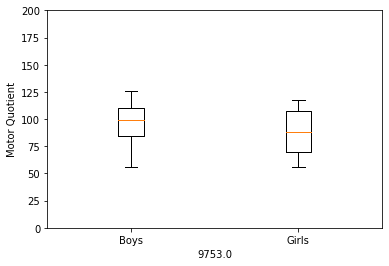

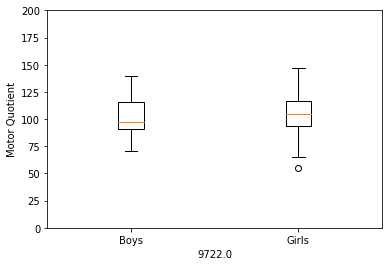

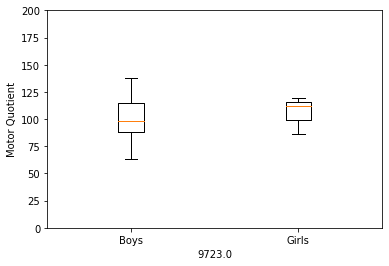

In [114]:


for i in zip_list_strings:
    fig, ax = plt.subplots()
    y_boys = motoric_gender_dict[i, 0]
    y_girls = motoric_gender_dict[i,1]
    ax.boxplot([y_boys, y_girls])
    ax.set_xlabel(i)
    ax.set_ylim(0, 200)
    ax.set_xticklabels(['Boys', 'Girls'])
    ax.set_ylabel('Motor Quotient')
    plt.show()

    
#ax.set_xticklabels(str(x[1]), rotation=90)
#ax.legend(motoric_gender_dict.keys(), bbox_to_anchor=(1.1, 1.05))

